In [ ]:
# -*- coding: utf-8 -*-
"""
Created on Apr 16, 2018

@author: Ganter
"""

In [1]:
import math
import numpy as np
#import matplotlib

import matplotlib.pyplot as plt




In [2]:
# Skeleton Implicit or Function Representation Modeler

# Transformation Rules: Scale, Translate, Rotate & Mirror

def scaleX(f,s):
    return f.replace('X','(X/'+str(s)+')')

def transX(f,s):
    if (s >= 0):
        return f.replace('X','(X-'+str(s)+')')
    else:   
        return f.replace('X','(X+'+str(abs(s))+')')
    
def d2R(a):
    return math.radians(a)   
    
def rotateR(f,a):
    a_str = str(a)
    f_temp = f.replace('X','(X*math.cos('+a_str+')+ tmp_tmp*math.sin('+a_str+'))')
    f_temp2 = f_temp.replace('Y','(-X*math.sin('+a_str+')+Y*math.cos('+a_str+'))')
    return f_temp2.replace('tmp_tmp','Y')
    
def rotate(f,a):   
    return rotateR(f,d2R(a))
    
# Simple Boolean Operators
    
def join(f,g):
    return 'min('+ f + ',' +g + ')'
        
def intersect(f,g):
    return 'max('+ f + ',' +g + ')'
    
def cut(f,g):
    return 'max('+ f + ',' + '-1*('+ g + '))'
    
def equi_pot(f,g):
    return 'abs(('+f+')'+'-'+'('+g+'))'+ '-1'   # 1 unit offset
    
# A couple of simple primatives

def circle(r):
     return 'X**2+Y**2-('+ str(r)+')**2'

def square(size):
    return 'max(abs(X/'+str(size/2)+'),abs(Y/'+str(size/2)+'))-1'
    
    

In [3]:
c1 = circle(1)
c2 = transX(c1,-2.5)
obj = join(c1,c2)
#obj = rotate(obj,90)
print(c1)
print(c2)
print(obj)
express = obj

X**2+Y**2-(1)**2
(X+2.5)**2+Y**2-(1)**2
min(X**2+Y**2-(1)**2,(X+2.5)**2+Y**2-(1)**2)


In [9]:
# how about a contour plot
delta = 0.1
x = np.arange(-4.0, 4.0, delta)
y = np.arange(-4.0, 4.0, delta)

fxy = np.ndarray(shape=(x.size,y.size), dtype=float)


# set up expression as a lambda function?
exp_as_func = eval('lambda X,Y: ' + express)

for i in range(0,x.size):
    X = x[i]
    for j in range(0,y.size):
        Y = y[j]
        fxy[i][j]=exp_as_func(X,Y)




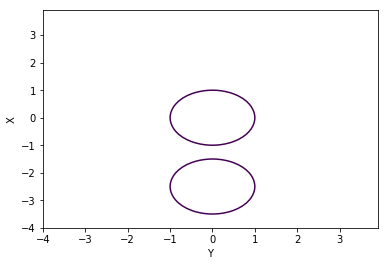

In [19]:
CS = plt.contour(x, y, fxy,[0])
plt.ylabel('X')
plt.xlabel('Y')
#plt.clabel(CS, inline=1, fontsize=10)
plt.show()

In [37]:
print(CS.allsegs[0][0])

[[  3.55271368e-15  -3.50000000e+00]
 [ -5.32907052e-15  -3.50000000e+00]
 [ -1.00000000e-01  -3.49473684e+00]
 [ -2.00000000e-01  -3.47894737e+00]
 [ -3.00000000e-01  -3.45263158e+00]
 [ -4.00000000e-01  -3.41578947e+00]
 [ -4.33333333e-01  -3.40000000e+00]
 [ -5.00000000e-01  -3.36470588e+00]
 [ -6.00000000e-01  -3.30000000e+00]
 [ -6.00000000e-01  -3.30000000e+00]
 [ -7.00000000e-01  -3.21333333e+00]
 [ -7.13333333e-01  -3.20000000e+00]
 [ -8.00000000e-01  -3.10000000e+00]
 [ -8.00000000e-01  -3.10000000e+00]
 [ -8.64705882e-01  -3.00000000e+00]
 [ -9.00000000e-01  -2.93333333e+00]
 [ -9.15789474e-01  -2.90000000e+00]
 [ -9.52631579e-01  -2.80000000e+00]
 [ -9.78947368e-01  -2.70000000e+00]
 [ -9.94736842e-01  -2.60000000e+00]
 [ -1.00000000e+00  -2.50000000e+00]
 [ -1.00000000e+00  -2.50000000e+00]
 [ -1.00000000e+00  -2.50000000e+00]
 [ -9.94736842e-01  -2.40000000e+00]
 [ -9.78947368e-01  -2.30000000e+00]
 [ -9.52631579e-01  -2.20000000e+00]
 [ -9.15789474e-01  -2.10000000e+00]
 

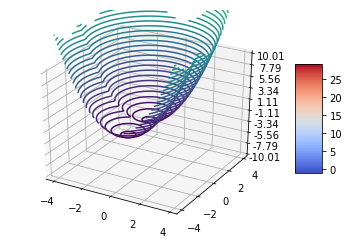

In [17]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import numpy as np


fig = plt.figure()
ax = fig.gca(projection='3d')

# Make data.
xx, yy = np.meshgrid(x, y)


# Plot the surface.
#surf = ax.plot_surface(xx,yy,fxy, cmap=cm.coolwarm,
#                       linewidth=0, antialiased=False)
ax.contour3D(xx, yy, fxy, 50)

# Customize the z axis.
ax.set_zlim(-10.01, 10.01)
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=4)

plt.show()
